<a href="https://colab.research.google.com/github/utkarsh0702/Tensorflow/blob/master/Dog_Breed_Identification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import os
from tensorflow import keras
import zipfile
from google.colab import files
import pandas as pd
import numpy as np
from google.colab import files
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

In [2]:
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
local_zip= '/content/drive/My Drive/datasets/dog-breed-identification.zip'
zip_ref= zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [5]:
df= pd.read_csv('labels.csv')
df

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever
...,...,...
10217,ffd25009d635cfd16e793503ac5edef0,borzoi
10218,ffd3f636f7f379c51ba3648a9ff8254f,dandie_dinmont
10219,ffe2ca6c940cddfee68fa3cc6c63213f,airedale
10220,ffe5f6d8e2bff356e9482a80a6e29aac,miniature_pinscher


**Choosing specific Dog Breeds**

In [97]:
breeds=['beagle', 'chihuahua', 'doberman','french_bulldog', 'golden_retriever', 'malamute', 'pug', 'saint_bernard', 'scottish_deerhound','tibetan_mastiff']
df1 = df.loc[df['breed'].apply(lambda x: any([k in x for k in breeds]))]
df1.head(10)

,id,breed
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever
9,0042188c895a2f14ef64a918ed9c7b64,scottish_deerhound
20,008b1271ed1addaccf93783b39deab45,doberman
25,00a366d4b4a9bbb6c8a63126697b7656,golden_retriever
37,0100f55e4f0fe28f2c0465d3fc4b9897,golden_retriever
79,01e787576c003930f96c966f9c3e1d44,scottish_deerhound
82,01f429667104c0c5a5f321700f15435c,malamute
84,0206c12e8984e3c8a166cc272de25d6f,chihuahua
92,023e4e28415506e0deddcbd8f8bdab29,pug
97,02508e76981e1ba059d785704b4c480c,pug


In [98]:
# added .jpg at the end of each object in id column
df1.id = df1.id + '.jpg'

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [99]:
df1['breed'].value_counts()

scottish_deerhound    126
beagle                105
pug                    94
saint_bernard          84
malamute               81
doberman               74
chihuahua              71
french_bulldog         70
tibetan_mastiff        69
golden_retriever       67
Name: breed, dtype: int64

In [9]:
# breed_number = {'beagle':0, 'chihuahua':1, 'doberman':2,'french_bulldog':3, 'golden_retriever':4,
#                    'malamute':5, 'pug':6, 'saint_bernard':7, 'scottish_deerhound':8,'tibetan_mastiff':9}
# for i in breed_number:
#   df1['breed'].replace(i, breed_number[i], inplace = True)
# df1

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:4582: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


,id,breed
4,0021f9ceb3235effd7fcde7f7538ed62.jpg,4
9,0042188c895a2f14ef64a918ed9c7b64.jpg,8
20,008b1271ed1addaccf93783b39deab45.jpg,2
25,00a366d4b4a9bbb6c8a63126697b7656.jpg,4
37,0100f55e4f0fe28f2c0465d3fc4b9897.jpg,4
...,...,...
10158,fe50bac6c389d137ea01c9cfc7346ca8.jpg,8
10161,fe624532170510bd80627c0500bafc97.jpg,9
10170,feb16cf86c9dac6d476e3c372ba5c279.jpg,6
10172,febcab8eb2da444bf83336cffec7eb92.jpg,4


In [100]:
datagen = keras.preprocessing.image.ImageDataGenerator(rescale=1./255, validation_split=0.1)

train_generator = datagen.flow_from_dataframe(
    df1,
    directory="train/",
    x_col="id",
    y_col="breed",
    target_size=(224, 224),
    batch_size=32, 
    subset="training")

validation_generator = datagen.flow_from_dataframe(
    df1,
    directory="train/",
    x_col="id",
    y_col="breed",
    target_size=(224, 224),
    batch_size=32,
    subset="validation")

Found 757 validated image filenames belonging to 10 classes.
Found 84 validated image filenames belonging to 10 classes.


In [11]:
feature_extractor = keras.applications.ResNet50(input_shape=(224,224,3), include_top=False, weights='imagenet')
feature_extractor.summary()

94773248/94765736 [==============================] - 0s 0us/step
Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
__________________________

In [101]:
keras.backend.clear_session()

model= keras.Sequential([
                         feature_extractor,
                         keras.layers.GlobalAveragePooling2D(),
                         keras.layers.Flatten(),
                         keras.layers.Dense(128, activation="relu"),
                         keras.layers.Dropout(0.4),
                         keras.layers.Dense(64, activation="relu"),
                         keras.layers.Dropout(0.4),
                         keras.layers.Dense(1, activation= "relu")
])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Functional)        (None, 7, 7, 2048)        23587712  
_________________________________________________________________
global_average_pooling2d (Gl (None, 2048)              0         
_________________________________________________________________
flatten (Flatten)            (None, 2048)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               262272    
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8256      
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0

In [102]:
num_layers= 6
feature_extractor.trainable= True;
for Layers in model.layers[-num_layers:]:
  Layers.trainable= True

In [103]:
STEP_SIZE_TRAIN = int(np.ceil(train_generator.n / train_generator.batch_size))
STEP_SIZE_VAL = int(np.ceil(validation_generator.n / validation_generator.batch_size))

print("Train step size:", STEP_SIZE_TRAIN)
print("Validation step size:", STEP_SIZE_VAL)

train_generator.reset()
validation_generator.reset()

Train step size: 24
Validation step size: 3


In [104]:
model.compile(
    optimizer= keras.optimizers.Adam(learning_rate=0.01, name='Adam'),
    loss= keras.losses.CategoricalCrossentropy(),
    metrics=['accuracy']
)

In [105]:
# a check point callback to save our best weights
checkpoint = keras.callbacks.ModelCheckpoint('dog_breed_classifier_model.h5', 
                                             monitor='val_accuracy', 
                                             verbose=1, save_best_only=True, 
                                             mode='max', save_weights_only=True)

# a reducing lr callback to reduce lr when val_accuracy doesn't increase
reduce_lr = keras.callbacks.ReduceLROnPlateau(monitor='val_accuracy', factor=0.2,
                                              patience=2, verbose=1, mode='max',
                                              min_delta=0.001, cooldown=2, min_lr=1e-7)


In [106]:
history = model.fit_generator(train_generator,
                              steps_per_epoch=STEP_SIZE_TRAIN,
                              validation_data=validation_generator,
                              validation_steps=STEP_SIZE_VAL,
                              epochs=50, callbacks=[checkpoint, reduce_lr])

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/50
24/24 [==============================] - 14s 372ms/step - loss: nan - accuracy: 0.7737 - val_loss: nan - val_accuracy: 0.9000

Epoch 00001: val_accuracy improved from -inf to 0.90000, saving model to dog_breed_classifier_model.h5
Epoch 2/50
24/24 [==============================] - 8s 333ms/step - loss: nan - accuracy: 0.7962 - val_loss: nan - val_accuracy: 0.9000

Epoch 00002: val_accuracy did not improve from 0.90000
Epoch 3/50
24/24 [==============================] - 8s 333ms/step - loss: nan - accuracy: 0.7900 - val_loss: nan - val_accuracy: 0.9000

Epoch 00003: val_accuracy did not improve from 0.90000

Epoch 00003: ReduceLROnPlateau reducing learning rate to 0.1.
Epoch 4/50
24/24 [==============================] - 8s 337ms/step - loss: nan - accuracy: 0.7784 - val_loss: nan - val_accuracy: 0.9000

Epoch 00004: val_accuracy did not improve from 0.90000
Epoch 5/50
24/24 [==============================] - 8s 338ms/step - loss: nan - accuracy: 0.7972 - val_loss: nan - val_a

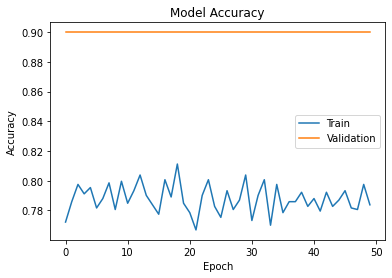

In [107]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='best')
plt.show()

# Prediction

In [ ]:
uploaded= files.upload()

for fn in uploaded.keys():
  # predict image
  path='/content/' + fn
  img= image.load_img(path, target_size=(300,300))
  plt.axis('off')
  plt.imshow(img)
  plt.show()
  x= image.img_to_array(img)
  x= np.expand_dims(x, axis=0)
  
  images= np.vstack([x])
  classes= model.predict(images, batch_size=10)
  print(classes[0])